# Analysis of Video Game Sales

## Project Overview:
#### 1. Data Preperation
#### 2. Attribute Analysis
    2a. Univariate Analysis
    2b. Multivariate Analysis      
#### 3. Trend Plots
    3a. Top Publisher Trends 
    3b. Top Genre Trends 
    3c. Console Family Trends
#### 4. Statistical Analyses
    4a. Statistical Significance of Console Groups
    4b. Statistical Significance of Decade of Title Release
#### 5. Machine Learning Models

In [1]:
## Importing libraries that will be utilized in project

import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# We will use matplotlib to plot figures
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import seaborn as sns

# For regression analysis we will use the statsmodels package
import statsmodels.formula.api as sm

# For visual inspection of the regression models
from statsmodels.graphics.regressionplots import plot_regress_exog, plot_fit, plot_leverage_resid2, influence_plot

#Data Preprocessing
from sklearn.preprocessing import LabelEncoder

import io
import scipy.stats as stats

from sklearn.svm import LinearSVR
from sklearn import ensemble
from sklearn.model_selection import learning_curve

import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib
import itertools
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("videogames.csv")

In [3]:
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.shape

(16598, 11)

In [5]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Identifying the datatypes of each of the columns will help when assigning attributes into their respective transformation pipelines in the feature engineering phase of the project.

## 1) Data Preperation

In this section, the general characteristics of the dataset are analyzed. Null and duplicate values are removed from the dataset to ensure that it doesn't alter the results of the analysis. Lastly, attribute datatypes are changed if their current state doesn't seem applicable to the data that in that column.

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().value_counts()

Rank   Name   Platform  Year   Genre  Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
False  False  False     False  False  False      False     False     False     False        False           16291
                        True   False  False      False     False     False     False        False             249
                        False  False  True       False     False     False     False        False              36
                        True   False  True       False     False     False     False        False              22
dtype: int64

In [9]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [10]:
vg = df.dropna()

In [11]:
vg.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [12]:
vg.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [13]:
vg['Year'] = vg['Year'].astype(int)

In [14]:
vg.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [15]:
years_to_drop = [2016, 2017, 2018, 2019, 2020]
vg = vg[~vg['Year'].isin(years_to_drop)]

In [16]:
vg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15945 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          15945 non-null  int64  
 1   Name          15945 non-null  object 
 2   Platform      15945 non-null  object 
 3   Year          15945 non-null  int32  
 4   Genre         15945 non-null  object 
 5   Publisher     15945 non-null  object 
 6   NA_Sales      15945 non-null  float64
 7   EU_Sales      15945 non-null  float64
 8   JP_Sales      15945 non-null  float64
 9   Other_Sales   15945 non-null  float64
 10  Global_Sales  15945 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.4+ MB


The dataset was created sometime in 2016, the author of the dataset mentioned how the data was webscraped from a website at the time to compile this data. Since the data doesn't consist of the full year of data for 2016, using it in our analysis would provide inaccurate results and a misrepresentation of the sales that occured that year. To avoid any inaccurate data in the forecasting and overall project, data after 2015 was omitted.

Summary of Data Preperation:
1. Dataset had null values in the 'Year' and 'Publisher' columns (271 and 58 respectively)
2. The null values were removed and the dataframe was renamed to vg (video games)
3. The 'Year' attribute datatype was changed from float to integer

## 2) Attribute Analysis 

In this section, further analysis will occur in the form of analyzing the unique values in each attribute.

In the Univariate Analysis section, the unique values in singular attributes will be studied and analyzed. An example of this analysis would be determining which Genre of game has the most title releases. 

In the Multivariate Analysis section, 2 or more attributes will be paired together and an analysis between both columns will be done. An example of this is where the Genre and Global Sales columns are paired and we can see which game genres generated the most revenue over the years.

In [17]:
for column in ['Platform','Year','Genre','Publisher']:
    print(vg[column].unique())

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
[2006 1985 2008 2009 1996 1989 1984 2005 1999 2007 2010 2013 2004 1990
 1988 2002 2001 2011 1998 2015 2012 2014 1992 1997 1993 1994 1982 2003
 1986 2000 1995 1991 1981 1987 1980 1983]
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari' '505 Games' 'Capcom'
 'GT Interactive' 'Konami Digital Entertainment'
 'Sony Computer Entertainment Europe' 'Square Enix' 'LucasArts'
 'Virgin Interactive' 'Warner Bros. Interactive Entertainment'
 'Universal Interactive' 'Eidos Interactive' 'RedOctane' 'Vivendi Games'
 'Enix Corporation' 'Namco Bandai Games' 'Palcom

In [18]:
#seperating numerical and categorical columns
numerical = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales', 'Global_Sales','Rank','Year']
categorical = ['Platform','Genre','Publisher','Name']

In [19]:
for i in vg[categorical].columns:
    x = vg[categorical][i].value_counts()
    print(i)
    print(x,'\n')

Platform
DS      2130
PS2     2127
Wii     1290
PS3     1272
X360    1226
PSP     1197
PS      1189
PC       900
XB       803
GBA      786
GC       542
3DS      464
PSV      350
N64      316
SNES     239
PS4      228
SAT      173
XOne     159
WiiU     133
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64 

Genre
Action          3132
Sports          2266
Misc            1668
Role-Playing    1428
Shooter         1250
Adventure       1241
Racing          1205
Platform         865
Simulation       838
Fighting         822
Strategy         660
Puzzle           570
Name: Genre, dtype: int64 

Publisher
Electronic Arts                 1319
Activision                       952
Ubisoft                          904
Namco Bandai Games               888
Konami Digital Entertainment     815
                                ... 
Milestone                          1
Ab

In [20]:
vg[numerical].describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rank,Year
count,15945.000000,15945.000000,15945.000000,15945.000000,15945.000000,15945.000000,15945.000000
mean,0.269973,0.149259,0.079683,0.048990,0.548180,8222.198369,2006.196927
std,0.830382,0.513081,0.314850,0.191804,1.581849,4776.235454,5.718780
min,0.000000,0.000000,0.000000,0.000000,0.010000,1.000000,1980.000000
25%,0.000000,0.000000,0.000000,0.000000,0.060000,4077.000000,2003.000000
50%,0.080000,0.020000,0.000000,0.010000,0.180000,8204.000000,2007.000000
75%,0.240000,0.110000,0.040000,0.040000,0.490000,12332.000000,2010.000000
max,41.490000,29.020000,10.220000,10.570000,82.740000,16600.000000,2015.000000


In [21]:
vg[categorical].describe()

,Platform,Genre,Publisher,Name
count,15945,15945,15945,15945
unique,31,12,564,11130
top,DS,Action,Electronic Arts,Need for Speed: Most Wanted
freq,2130,3132,1319,12


### Univariate Analysis

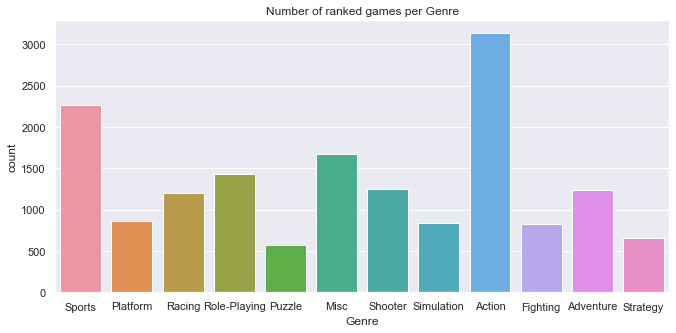

In [22]:
#Plotting counts of each genre category's titles
sns.set(rc={"figure.figsize":(11, 5)})
plt.title("Number of ranked games per Genre")
plt.xlabel('Genre')
plt.ylabel('Count')

plot1 = sns.countplot(data=vg,x='Genre')

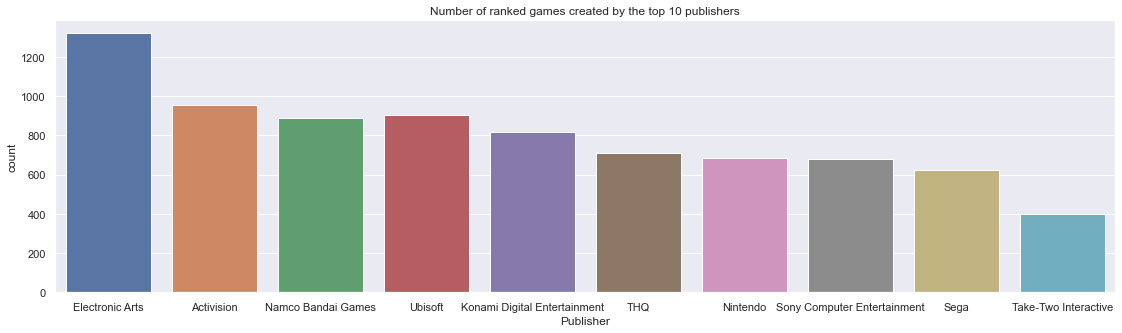

In [23]:
#Plotting counts of each publisher company's released titles
sns.set(rc={"figure.figsize":(19, 5)})
plt.title("Number of ranked games created by the top 10 publishers")
plt.xlabel('Publisher')
plt.ylabel('Count')

top_10 = df['Publisher'].value_counts().nlargest(10).index

plot1 = sns.countplot(data=vg,x="Publisher", order=top_10)

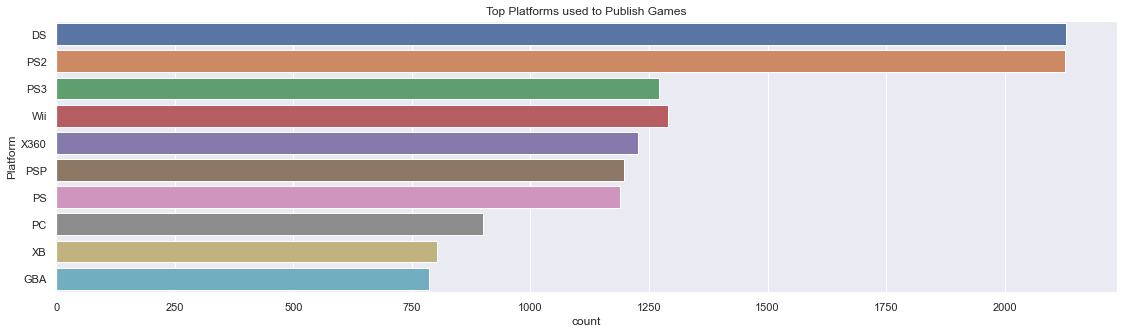

In [24]:
#Plotting counts of each platform's released titles
sns.set(rc={"figure.figsize":(19, 5)})
plt.title("Top Platforms used to Publish Games")
plt.xlabel('Publisher')
plt.ylabel('Count')

top_15 = df['Platform'].value_counts().nlargest(10).index

plot1 = sns.countplot(data=vg,y="Platform", order=top_15)

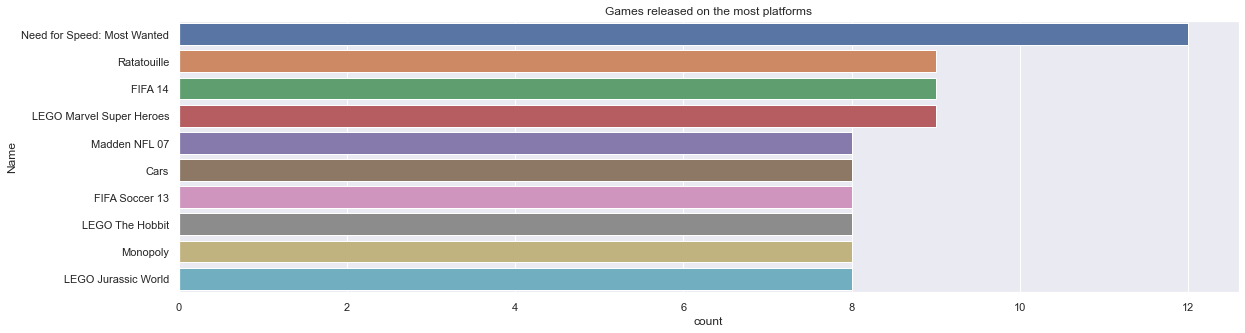

In [25]:
#Plotting counts of each title's most releases (typically on differing platforms)
sns.set(rc={"figure.figsize":(19, 5)})
plt.title("Games released on the most platforms")
plt.xlabel('Publisher')
plt.ylabel('Count')

top_15 = df['Name'].value_counts().nlargest(10).index

plot1 = sns.countplot(data=vg,y="Name", order=top_15)

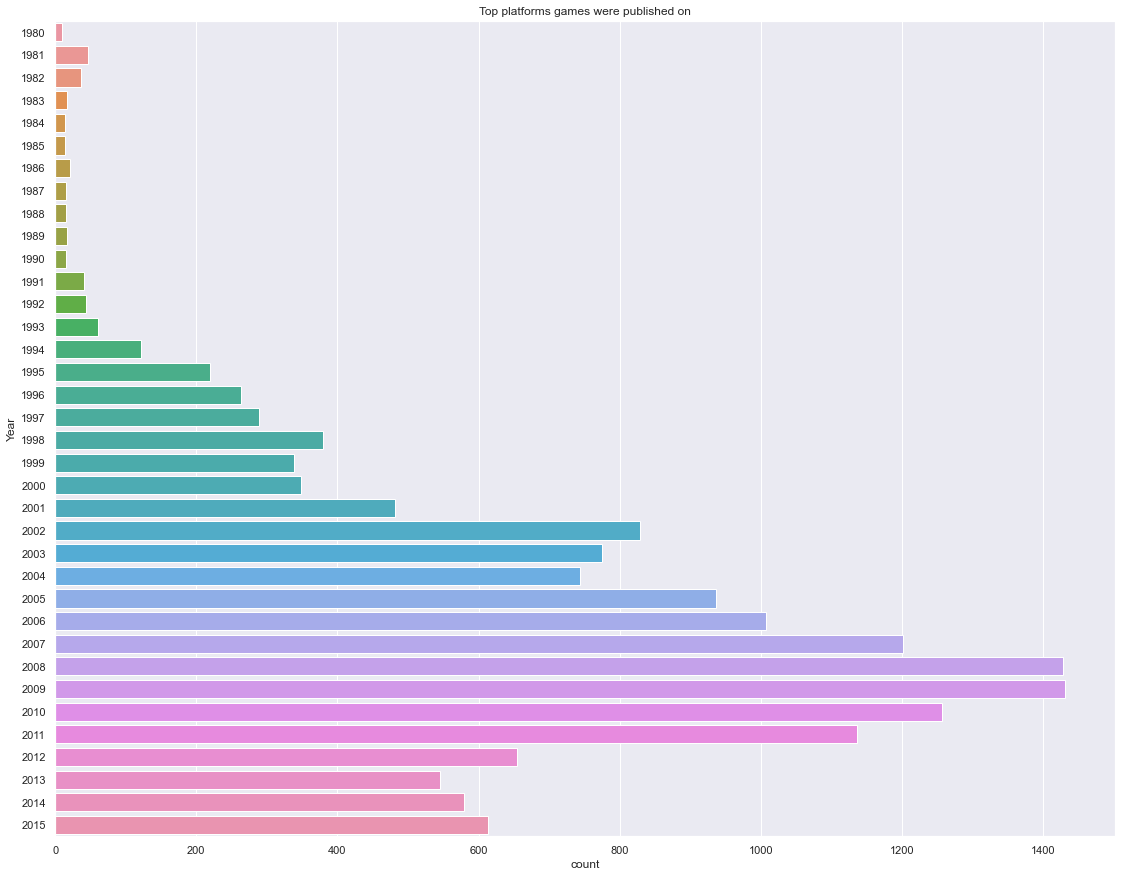

In [26]:
#Plotting counts of title releases for each year
sns.set(rc={"figure.figsize":(19, 15)})
plt.title("Top platforms games were published on")
plt.xlabel('Publisher')
plt.ylabel('Count')

plot1 = sns.countplot(data=vg,y="Year")

### Multivariate Analysis

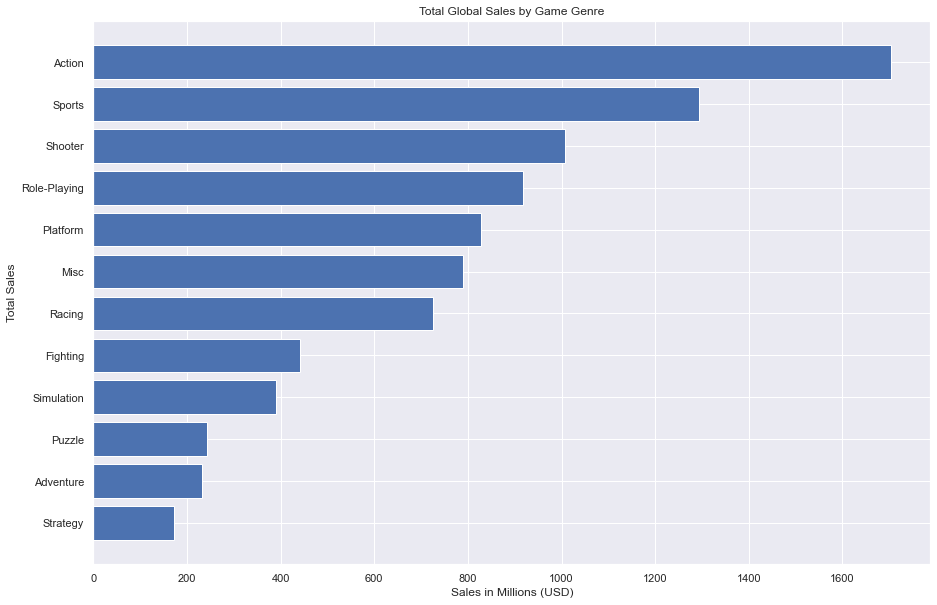

In [27]:
AVG_sales_by_genre = vg.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(15, 10))
ax.barh(AVG_sales_by_genre.index, AVG_sales_by_genre.values)
ax.set_title('Total Global Sales by Game Genre')
ax.set_xlabel('Sales in Millions (USD)')
ax.set_ylabel('Total Sales')
plt.show()

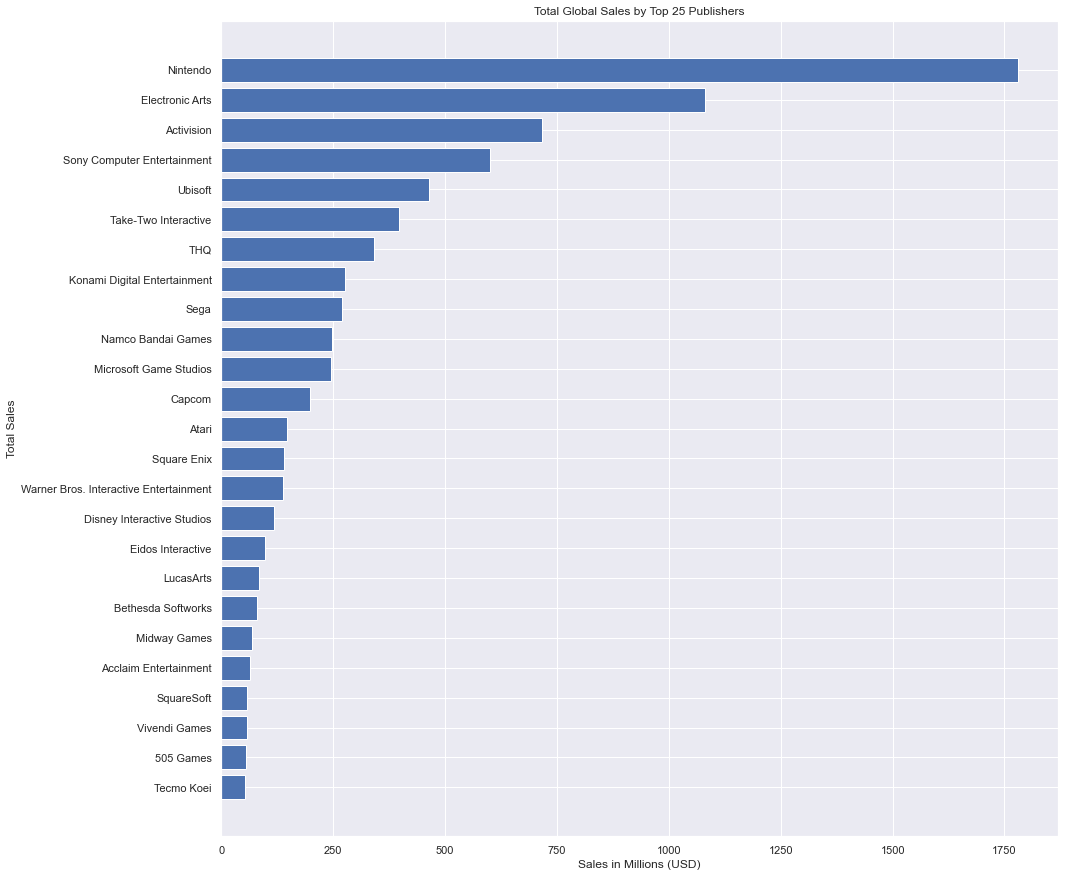

In [28]:
avg_sales_by_publisher = vg.groupby('Publisher')['Global_Sales'].sum().nlargest(25).sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(15, 15))
ax.barh(avg_sales_by_publisher.index, avg_sales_by_publisher.values)
ax.set_title('Total Global Sales by Top 25 Publishers')
ax.set_xlabel('Sales in Millions (USD)')
ax.set_ylabel('Total Sales')
plt.show()

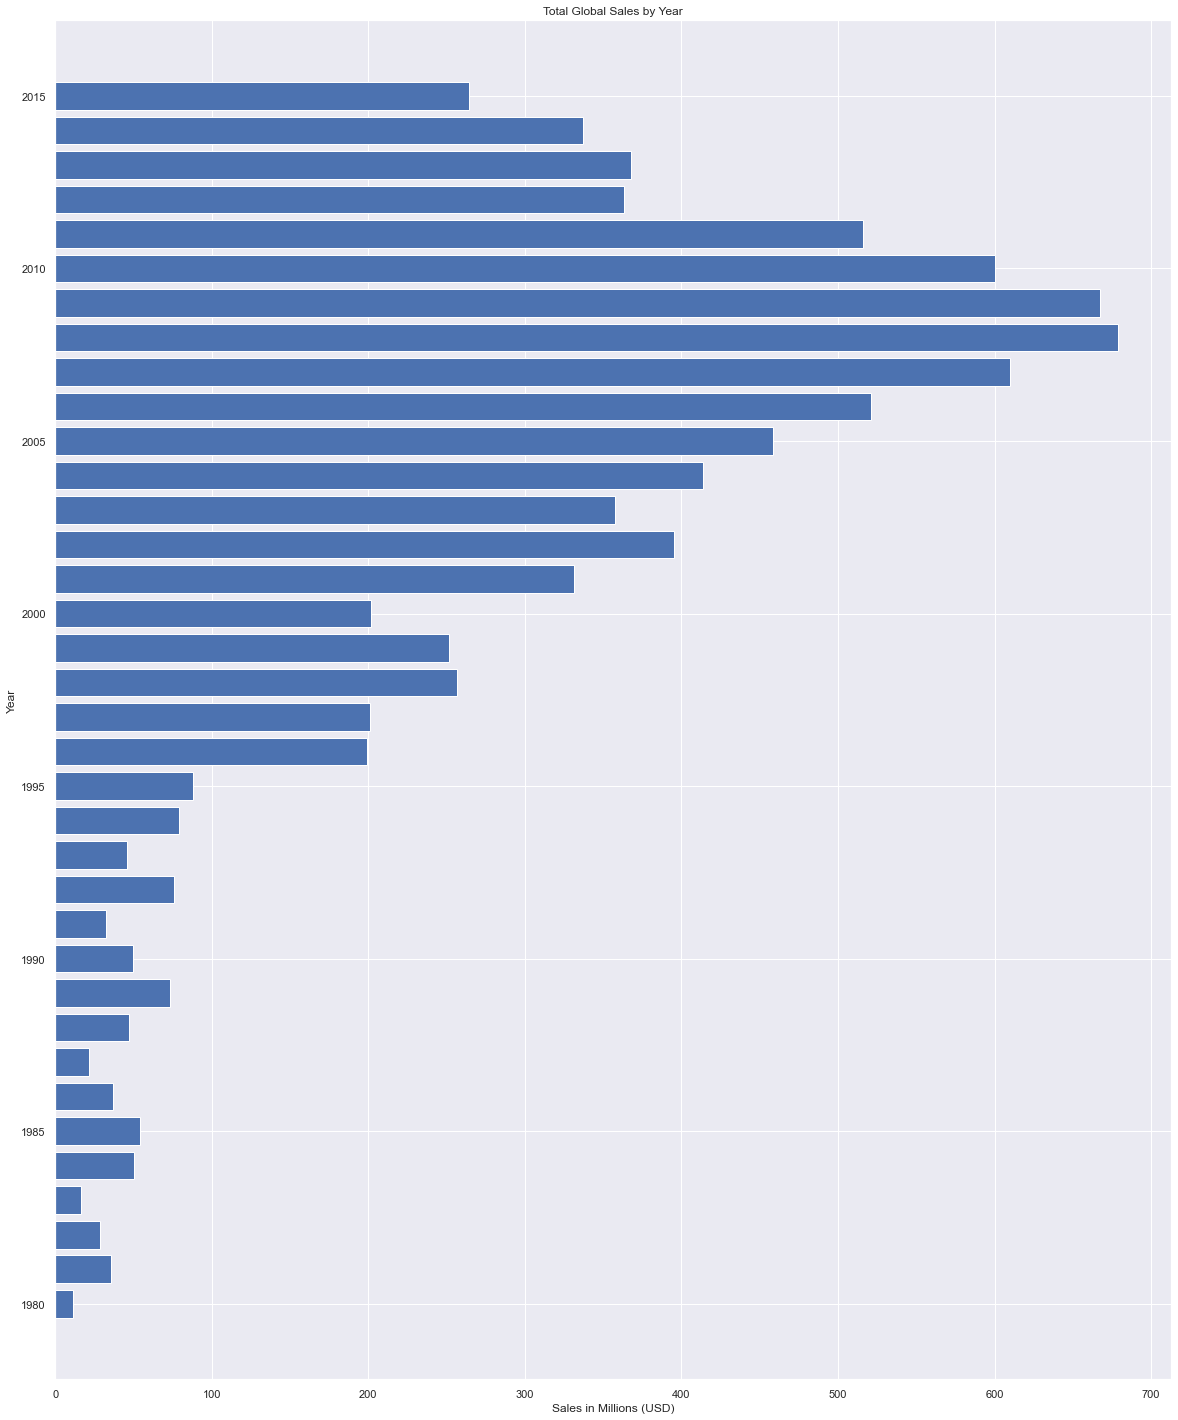

In [29]:
total_sales_by_year = vg.groupby('Year')['Global_Sales'].sum().sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(20, 25))
ax.barh(total_sales_by_year.index, total_sales_by_year.values)
ax.set_title('Total Global Sales by Year')
ax.set_xlabel('Sales in Millions (USD)')
ax.set_ylabel('Year')
plt.show()

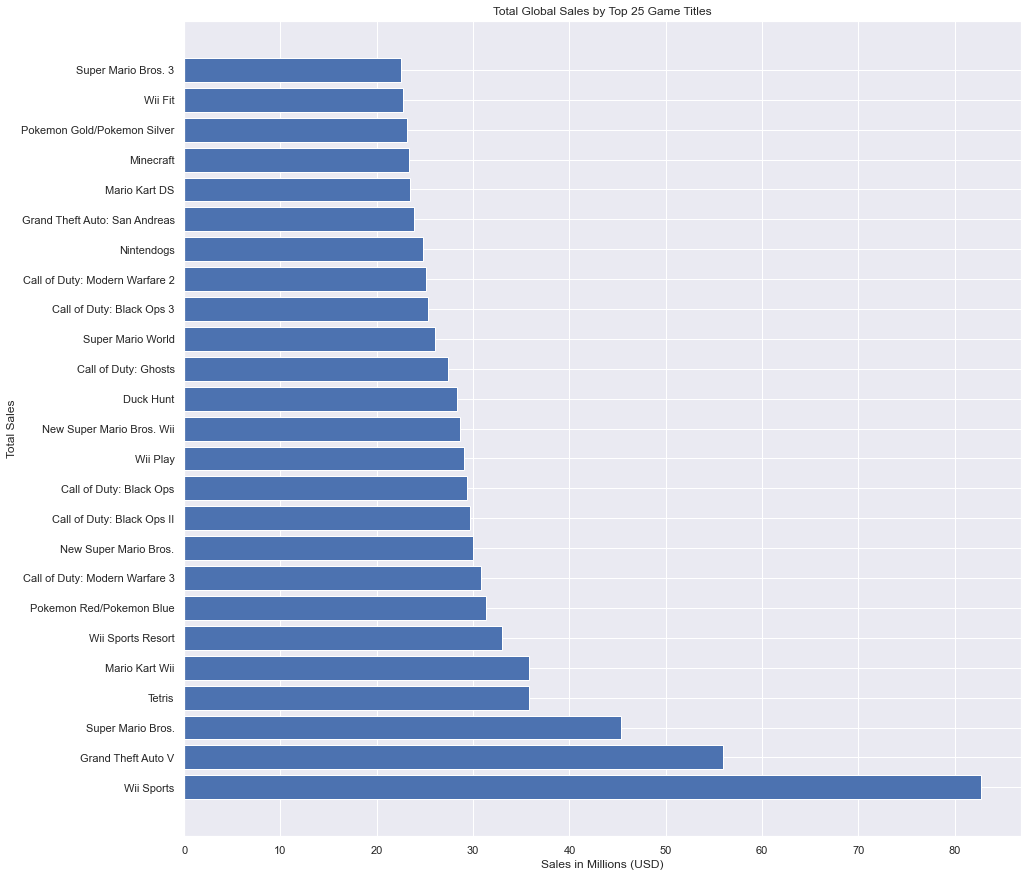

In [30]:
avg_sales_by_publisher = vg.groupby('Name')['Global_Sales'].sum().nlargest(25).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(15, 15))
ax.barh(avg_sales_by_publisher.index, avg_sales_by_publisher.values)
ax.set_title('Total Global Sales by Top 25 Game Titles')
ax.set_xlabel('Sales in Millions (USD)')
ax.set_ylabel('Total Sales')
plt.show()

Summary of Attribute Analysis:
1. Most of the games in the dataset fall under the "Action" and "Sports" genres.
2. Most of the games in the dataset were published by the Electronic Arts (EA) and Activision companies.
3. Most of the games were released on the Nintendo DS and Playstation 2 Consoles.
4. Need for Speed: Most Wanted was released on the most platforms. NOTE: Two completely different versions of the game exist, but under the same name.
5. Most of the game titles were released in the year 2009, followed by 2008.
6. The most profitable game title was Wii Sports.

## 3) Trend Plots 

In this section, we will be preparing our data for later forecasting. The following lineplots will be set up to show trends relating to different aspects of the dataset. An example of one of the line plots would be how sales in different regions varied for the Nintendo brand. Furthermore, outlier data may be identified and later removed so it doesn't affect the forecasting stage of the project.

### Top Publisher Trend Plots

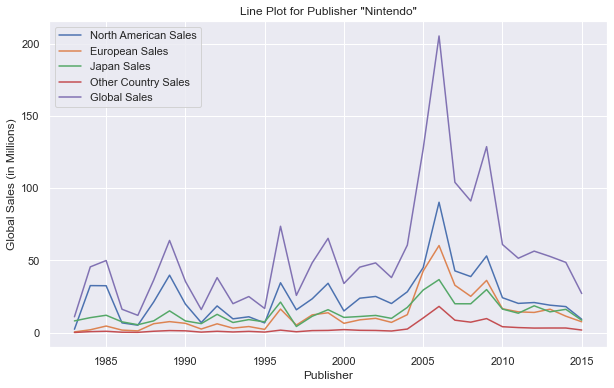

In [31]:
#Nintendo Trend Plot
nintendo_data = vg[vg['Publisher'] == 'Nintendo']
sales_by_year = nintendo_data.groupby('Year')[['Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum().reset_index()

plt.figure(figsize=(10, 6))  
sns.lineplot(data=sales_by_year, x='Year', y='NA_Sales', label='North American Sales',ci=None)
sns.lineplot(data=sales_by_year, x='Year', y='EU_Sales', label='European Sales',ci=None)
sns.lineplot(data=sales_by_year, x='Year', y='JP_Sales', label='Japan Sales',ci=None)
sns.lineplot(data=sales_by_year, x='Year', y='Other_Sales', label='Other Country Sales',ci=None)
sns.lineplot(data=sales_by_year, x='Year', y='Global_Sales', label='Global Sales',ci=None)

plt.title('Line Plot for Publisher "Nintendo"')
plt.xlabel('Publisher')
plt.ylabel('Global Sales (in Millions)')
plt.legend(loc='upper left')  

plt.show()

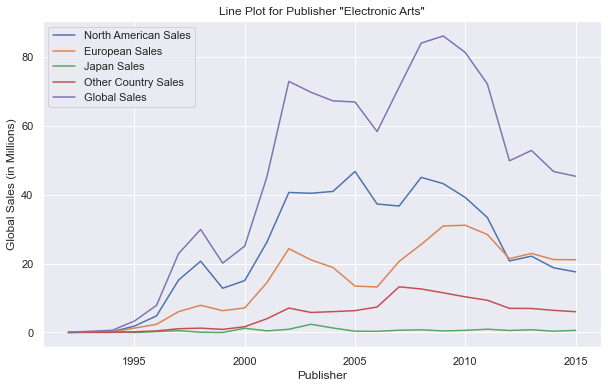

In [32]:
#Electronic Arts (EA) Trend Plot
ea_data = vg[vg['Publisher'] == 'Electronic Arts']
sales_by_year = ea_data.groupby('Year')[['Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum().reset_index()

plt.figure(figsize=(10, 6)) 
sns.lineplot(data=sales_by_year, x='Year', y='NA_Sales', label='North American Sales',ci=None)
sns.lineplot(data=sales_by_year, x='Year', y='EU_Sales', label='European Sales',ci=None)
sns.lineplot(data=sales_by_year, x='Year', y='JP_Sales', label='Japan Sales',ci=None)
sns.lineplot(data=sales_by_year, x='Year', y='Other_Sales', label='Other Country Sales',ci=None)
sns.lineplot(data=sales_by_year, x='Year', y='Global_Sales', label='Global Sales',ci=None)

plt.title('Line Plot for Publisher "Electronic Arts"')
plt.xlabel('Publisher')
plt.ylabel('Global Sales (in Millions)')
plt.legend(loc='upper left')  

plt.show()

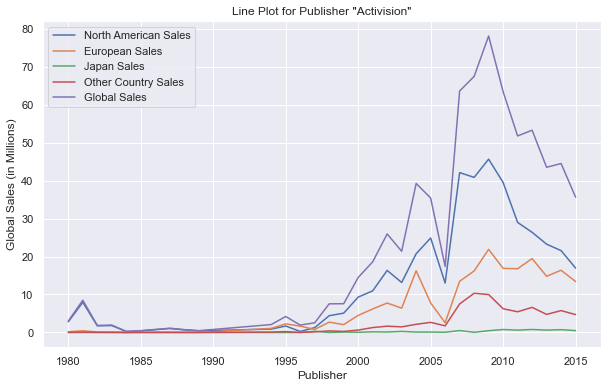

In [33]:
#Nintendo Trend Plot
activision_data = vg[vg['Publisher'] == 'Activision']
sales_by_year = activision_data.groupby('Year')[['Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum().reset_index()

plt.figure(figsize=(10, 6))  
sns.lineplot(data=sales_by_year, x='Year', y='NA_Sales', label='North American Sales',ci=None)
sns.lineplot(data=sales_by_year, x='Year', y='EU_Sales', label='European Sales',ci=None)
sns.lineplot(data=sales_by_year, x='Year', y='JP_Sales', label='Japan Sales',ci=None)
sns.lineplot(data=sales_by_year, x='Year', y='Other_Sales', label='Other Country Sales',ci=None)
sns.lineplot(data=sales_by_year, x='Year', y='Global_Sales', label='Global Sales',ci=None)

plt.title('Line Plot for Publisher "Activision"')
plt.xlabel('Publisher')
plt.ylabel('Global Sales (in Millions)')
plt.legend(loc='upper left')  

plt.show()

### Top Genre Trend Plots

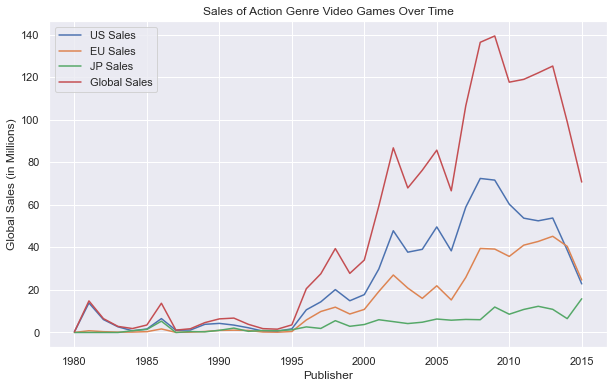

In [34]:
#Action Genre
action_df= vg[vg['Genre'] == 'Action']
sales_by_year = action_df.groupby('Year')[['Global_Sales','NA_Sales','EU_Sales','JP_Sales']].sum().reset_index()

plt.figure(figsize=(10, 6)) 
sns.lineplot(data=sales_by_year, x='Year', y='NA_Sales', label='US Sales',ci=None)
sns.lineplot(data=sales_by_year, x='Year', y='EU_Sales', label='EU Sales',ci=None)
sns.lineplot(data=sales_by_year, x='Year', y='JP_Sales', label='JP Sales',ci=None)
sns.lineplot(data=sales_by_year, x='Year', y='Global_Sales', label='Global Sales',ci=None)

plt.title('Sales of Action Genre Video Games Over Time')
plt.xlabel('Publisher')
plt.ylabel('Global Sales (in Millions)')
plt.legend(loc='upper left')  

plt.show()

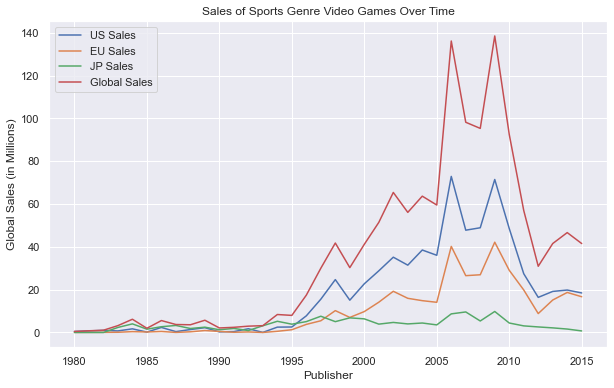

In [35]:
#Action Genre
action_df= vg[vg['Genre'] == 'Sports']
sales_by_year = action_df.groupby('Year')[['Global_Sales','NA_Sales','EU_Sales','JP_Sales']].sum().reset_index()

plt.figure(figsize=(10, 6)) 
sns.lineplot(data=sales_by_year, x='Year', y='NA_Sales', label='US Sales',ci=None)
sns.lineplot(data=sales_by_year, x='Year', y='EU_Sales', label='EU Sales',ci=None)
sns.lineplot(data=sales_by_year, x='Year', y='JP_Sales', label='JP Sales',ci=None)
sns.lineplot(data=sales_by_year, x='Year', y='Global_Sales', label='Global Sales',ci=None)

plt.title('Sales of Sports Genre Video Games Over Time')
plt.xlabel('Publisher')
plt.ylabel('Global Sales (in Millions)')
plt.legend(loc='upper left')  

plt.show()

### Console Family Analysis

In this subsection, a general hypothesis is that sales for the predesesor console would drop following the release of the newer generation console. This will be tested on the Playstation, Wii, and Nintendo console families.

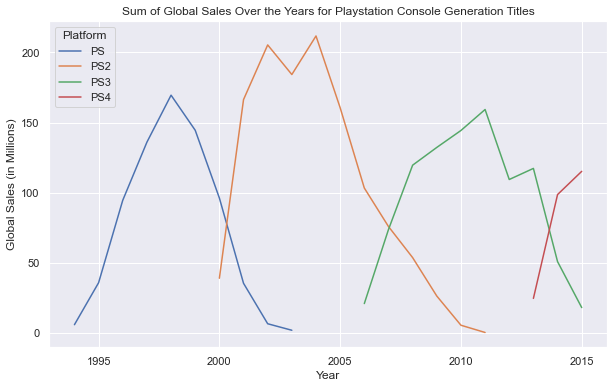

In [36]:
#Playstation Consoles
selected_consoles = ['PS', 'PS2', 'PS3', 'PS4']
filtered_df = vg[vg['Platform'].isin(selected_consoles)]
sales_by_year_platform = filtered_df.groupby(['Year', 'Platform'])['Global_Sales'].sum().reset_index()

plt.figure(figsize=(10, 6)) 

sns.lineplot(x='Year', y='Global_Sales', hue='Platform', data=sales_by_year_platform, ci=None)

plt.xlabel('Year')
plt.ylabel('Global Sales (in Millions)')
plt.title('Sum of Global Sales Over the Years for Playstation Console Generation Titles')

plt.legend(title='Platform', loc='upper left')

plt.show()

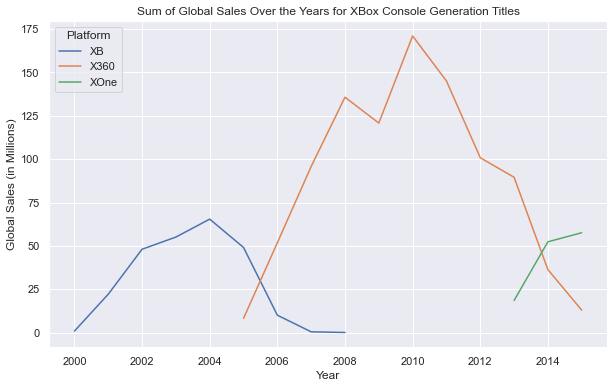

In [37]:
#XBox Consoles
selected_consoles = ['XB', 'X360', 'XOne']
xbox_platforms_df = vg[vg['Platform'].isin(selected_consoles)]
sales_by_year_platform = xbox_platforms_df.groupby(['Year', 'Platform'])['Global_Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))

sns.lineplot(x='Year', y='Global_Sales', hue='Platform', data=sales_by_year_platform, ci=None)

plt.xlabel('Year')
plt.ylabel('Global Sales (in Millions)')
plt.title('Sum of Global Sales Over the Years for XBox Console Generation Titles')

plt.legend(title='Platform', loc='upper left')

plt.show()

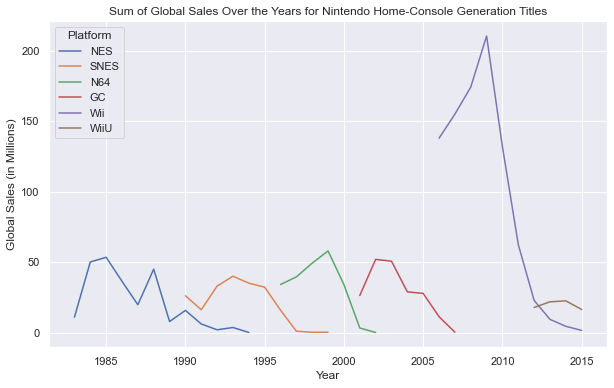

In [38]:
#Nintendo Consoles
selected_consoles = ['NES', 'SNES', 'N64','GC','Wii','WiiU']
nintendo_consoles_df = vg[vg['Platform'].isin(selected_consoles)]
sales_by_year_platform = nintendo_consoles_df.groupby(['Year', 'Platform'])['Global_Sales'].sum().reset_index()

# Create the line plot using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size

sns.lineplot(x='Year', y='Global_Sales', hue='Platform', data=sales_by_year_platform, ci=None)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Global Sales (in Millions)')
plt.title('Sum of Global Sales Over the Years for Nintendo Home-Console Generation Titles')

# Show the legend
plt.legend(title='Platform', loc='upper left')

# Display the plot
plt.show()

Observations:
1. The general trend that can be seen is that when a newer generation console is released, the previous console's title sales see a decline, while the newer generation console's title sales increase.
2. Each generation of the console, regardless of console family, sees a peak in their sales during a certain time prior to title sales declining. The newer generation consoles are always released once the previous generation sees a considerable decline in sales.

### Top Publishers Sales Over 35 Years

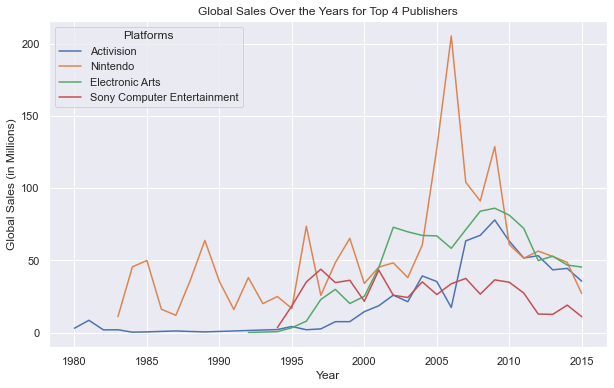

In [39]:
selected_publishers = ['Activision', 'Electronic Arts', 'Nintendo', 'Sony Computer Entertainment']
publishers_df = vg[vg['Publisher'].isin(selected_publishers)]
sales_by_year_publishers_df = publishers_df.groupby(['Year', 'Publisher'])['Global_Sales'].sum().reset_index()


# Create the line plot using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size

sns.lineplot(x='Year', y='Global_Sales', hue='Publisher', data=sales_by_year_publishers_df,ci=None)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Global Sales (in Millions)')
plt.title('Global Sales Over the Years for Top 4 Publishers')

# Show the legend
plt.legend(title='Platforms', loc='upper left')

# Display the plot
plt.show()

## Statistical Analysis of Different Factors

Statistical tests will be utilized to determine if the below factors contributed to statistically proving if global sales were different, or not different from each other. The null hypothesis, H0, will be that the factors are not statistically different, while H1 is that they are statistically different. An alpha value of 0.05 will be utilized.

### Are global sales statistically different across platform groups?

In [40]:
#Engineering a new attribute, where console generations are grouped by console family, the new attribute is PlatformGroup
col_list1 = list(vg["Platform"])

PlatformGroup = []

for platform in col_list1:
    if platform in ['PS', 'PS2', 'PS3', 'PS4']: 
        PlatformGroup.append(1)
    elif platform in ['XB', 'X360', 'XOne']:
        PlatformGroup.append(2)
    elif platform in ['NES', 'SNES', 'N64','GC','Wii','WiiU']:
        PlatformGroup.append(3)
    else:
        PlatformGroup.append(0)
vg['PlatformGroup'] = PlatformGroup

In [41]:
vg.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,PlatformGroup
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,3
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,3
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,3
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,3
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0


In [42]:
#Utilizing ANOVA statistical test to see if the global sales are statistically different or not different

from scipy.stats import f_oneway

consoleFamily_data = vg.groupby('PlatformGroup')['Global_Sales'].mean()
print(consoleFamily_data)

# Creating dataframes for rows that correlate with numeric PlatformGroup values
playstation_df = vg[vg['PlatformGroup'] == 1]
xbox_df = vg[vg['PlatformGroup'] == 2]
nintendo_df = vg[vg['PlatformGroup'] == 3]

psArr = playstation_df['Global_Sales'].values
xboxArr = xbox_df['Global_Sales'].values
nintendoArr = nintendo_df['Global_Sales'].values

f_value, p_value = f_oneway(psArr, xboxArr, nintendoArr)

print("F-value:", f_value)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject H0, the mean of global sales across different consoles are significantly different.")
else:
    print("Fail to reject H0, there is no significant difference between global sales across different consoles.")

PlatformGroup
0    0.377969
1    0.653328
2    0.616796
3    0.708499
Name: Global_Sales, dtype: float64
F-value: 1.724647630717647
p-value: 0.17829095539325998
Fail to reject H0, there is no significant difference between global sales across different consoles.


### Are global sales statistically different across different decades?

In [43]:
#Engineering a new column/attribute that will group the Years into respective decades
col_list1 = list(vg["Year"])

DecadeGroup = []

for platform in col_list1:
    if platform in [1980,1981,1982,1983,1984,1985,1986,1987,1988,1989]: 
        DecadeGroup.append(1)
    elif platform in [1990,1991,1992,1993,1994,1995,1996,1997,1998,1999]:
        DecadeGroup.append(2)
    elif platform in [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009]:
        DecadeGroup.append(3)
    else:
        DecadeGroup.append(4)
vg['DecadeGroup'] = DecadeGroup

In [44]:
vg.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,PlatformGroup,DecadeGroup
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,3,3
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,3,1
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,3,3
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,3,3
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0,2


In [45]:
from scipy.stats import f_oneway

decadeData = vg.groupby('DecadeGroup')['Global_Sales'].mean()
print(decadeData)

# Creating dataframes for rows that correlate with numeric PlatformGroup values
eightys_df = vg[vg['DecadeGroup'] == 1]
ninetys_df = vg[vg['DecadeGroup'] == 2]
twothousands_df = vg[vg['DecadeGroup'] == 3]
twentytens_df = vg[vg['DecadeGroup'] == 4]

eightysArr = eightys_df['Global_Sales'].values
ninetysArr = ninetys_df['Global_Sales'].values
twothousandsArr = twothousands_df['Global_Sales'].values
twentytensArr = twentytens_df['Global_Sales'].values

f_value, p_value = f_oneway(eightysArr, ninetysArr, twothousandsArr, twentytensArr)

print("F-value:", f_value)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject H0, the mean of global sales across different consoles are significantly different.")
else:
    print("Fail to reject H0, there is no significant difference between global sales across different consoles.")

DecadeGroup
1    1.836976
2    0.722956
3    0.504855
4    0.511520
Name: Global_Sales, dtype: float64
F-value: 56.29127117600472
p-value: 3.454588034343654e-36
Reject H0, the mean of global sales across different consoles are significantly different.


Observations:
1. Amongst the three platform giants, the sales were generally the same. Although Nintendo had started its reign in the industry far before Playstation and XBox, the sales amongst these platforms were statistically the same.

2. The 1980's generally saw the most profits amongst video game sales. This was interesting as I hypothesized that with inflation in later years, along with the release of multiple new games, that the newer generation games would have had more sales. The 80's admittedly had more iconic games that withstood the test of time. As a result, the sales amongst each decades were statistically different.

## In Progress: Sales Forecasting

Utilizing the data trends seen from 1980 to 2015, future sales can be forecasted. Typically a time series analysis would occur with data that has more intervals, however, this dataset didn't grant us access to such intervals, thus the 36 years will be utilized.

In [46]:
ts_global_sales = vg.groupby('Year')['Global_Sales'].sum().reset_index()

In [47]:
ts_global_sales = ts_global_sales.set_index('Year')
ts_global_sales.index

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013, 2014, 2015],
           dtype='int64', name='Year')

## Training Machine Learning Models

The attributes in the dataset will be transformed to allow the models to work more efficiently.
Hypertuning will also be utilized to further improve the models. The engineered columns in the Statistical Testing section of the notebook will also be utilized as well.

For this analysis, the following questions will be answered:
1. Can we accurately predict the global sales for each game by only utilizing the sales data of a single region?
2. Can we accurately predit the genre of a game title?

For the classification analysis, the target attribute is: Genre. For the regression analysis, the target attribute is: Global_Sales.

Different types of classification and regression models will be utilized and trained. The models will be compared for accuracy to determine which one fits the data the best.

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [49]:
vg.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'PlatformGroup',
       'DecadeGroup'],
      dtype='object')

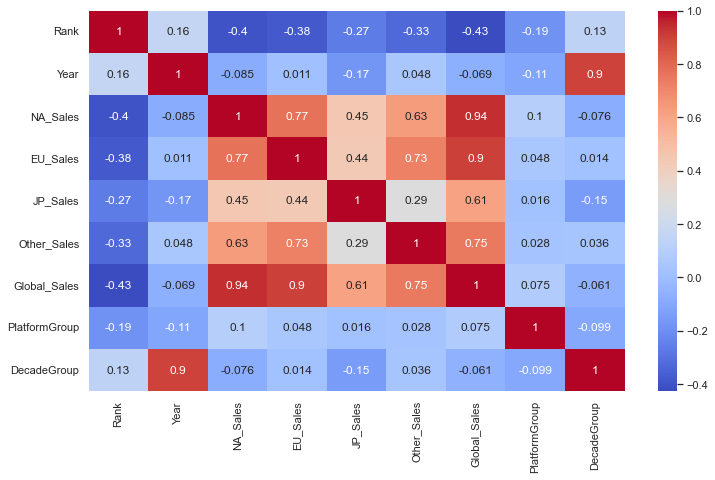

In [50]:
vg_coor = vg.corr()

plt.figure(figsize=(12, 7))

sns.heatmap(vg_coor,annot=True, cmap='coolwarm')

plt.show()

### Regression Model

In [51]:
rf_target = ['Global_Sales']
numerical = ['NA_Sales','DecadeGroup','PlatformGroup']
categorical = ['Publisher', 'Platform','Genre','Year']

In [52]:
#pipeline for categorical data

cat_si_step = ('si', SimpleImputer(strategy='constant', fill_value='Other'))
cat_ohe_step = ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))
cat_steps = [cat_si_step, cat_ohe_step]
cat_pipe = Pipeline(cat_steps)
cat_transformers = [('cat', cat_pipe, categorical)]

In [53]:
#Creating pipeline for numerical data

#imputing using fill_value = median
num_si_step = ('num_si', SimpleImputer(strategy='median'))

#creating MinMaxScale for numerical data 
num_scale_step = ('num_scale', MinMaxScaler())

#creating transformers for numerical data
num_steps = [num_si_step, num_scale_step]
num_pipe = Pipeline(num_steps)
num_transformers = [('num', num_pipe, numerical)]

In [54]:
ct = ColumnTransformer(transformers=cat_transformers+num_transformers)
ct.fit(vg[categorical+numerical])

X = ct.transform(vg[categorical+numerical])
y = vg['Global_Sales'].values

In [55]:
#Creating train set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state = 5,shuffle=True)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(12756, 646) (3189, 646) (12756,) (3189,)


In [56]:
#Creating validation set
X_valid, X_testv, y_valid, y_testv = train_test_split(X_test, y_test, test_size=0.25, random_state=42)

print(X_valid.shape, X_testv.shape, y_valid.shape, y_testv.shape)

(2391, 646) (798, 646) (2391,) (798,)


In [57]:
from sklearn.ensemble import RandomForestRegressor
import time
time_start = time.time()

rf = RandomForestRegressor()

rf.fit(X_train, y_train)

print('Time elapsed: {} seconds'.format(time.time()-time_start))

y_pred = rf.predict(X_test)

Time elapsed: 38.43821358680725 seconds


In [58]:
from sklearn.metrics import mean_squared_error, r2_score

RF_mse = mean_squared_error(y_test, y_pred)
RF_r2 = r2_score(y_test, y_pred)*100
 
print("Mean Squared Error:", RF_mse)
print("R-squared Score:", RF_r2)

Mean Squared Error: 0.18113245904373498
R-squared Score: 91.82747053065592


In [66]:
from sklearn.metrics import mean_squared_error, r2_score

y_predv = rf.predict(X_testv)

RF_mse = mean_squared_error(y_testv, y_predv)
RF_r2 = r2_score(y_testv, y_predv)*100
 
print("Mean Squared Error:", RF_mse)
print("R-squared Score:", RF_r2)

Mean Squared Error: 0.26162561241029925
R-squared Score: 90.60376996319323


In [59]:
from sklearn.linear_model import Ridge,Lasso,LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor


rf = RandomForestRegressor().fit(X_train,y_train)
dt = DecisionTreeRegressor().fit(X_train,y_train)
knn = KNeighborsRegressor().fit(X_train,y_train)
ridge=Ridge().fit(X_train,y_train)
lasso=Lasso().fit(X_train,y_train)
ada=AdaBoostRegressor().fit(X_train,y_train)
gbm=GradientBoostingRegressor().fit(X_train,y_train)

In [60]:
models = [ridge,lasso,knn,rf,dt,ada,gbm]

In [61]:
def ML(Y,models):
    y_pred = models.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)*100
    return mse,r2

In [62]:
print ("                    Mean Error, R Squared Score")
for i in models:
    print("\n",i,"\n Model Accuracy:",ML("e",i))

                    Mean Error, R Squared Score

 Ridge() 
 Model Accuracy: (0.3044555042820289, 86.26324848685394)

 Lasso() 
 Model Accuracy: (2.217309803573397, -0.042973015641223355)

 KNeighborsRegressor() 
 Model Accuracy: (1.1940809056130448, 46.12417099937115)

 RandomForestRegressor() 
 Model Accuracy: (0.19237075685072658, 91.32040890019063)

 DecisionTreeRegressor() 
 Model Accuracy: (0.3319604652623895, 85.02225001892677)

 AdaBoostRegressor() 
 Model Accuracy: (2.6106315692372197, -17.789288269087322)

 GradientBoostingRegressor() 
 Model Accuracy: (0.17101484780956006, 92.28396781671493)


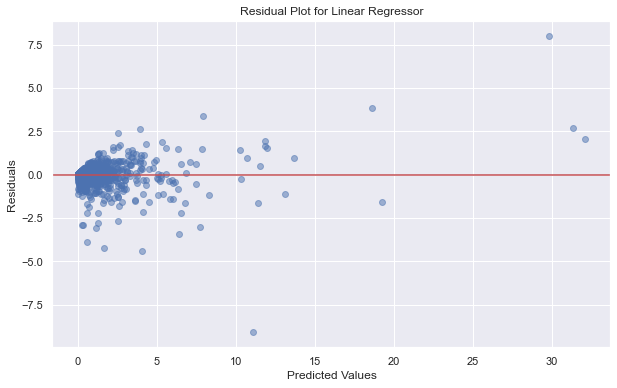

In [65]:
#Residual Plots
residuals = y_pred - y_test

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Linear Regressor")
plt.show()

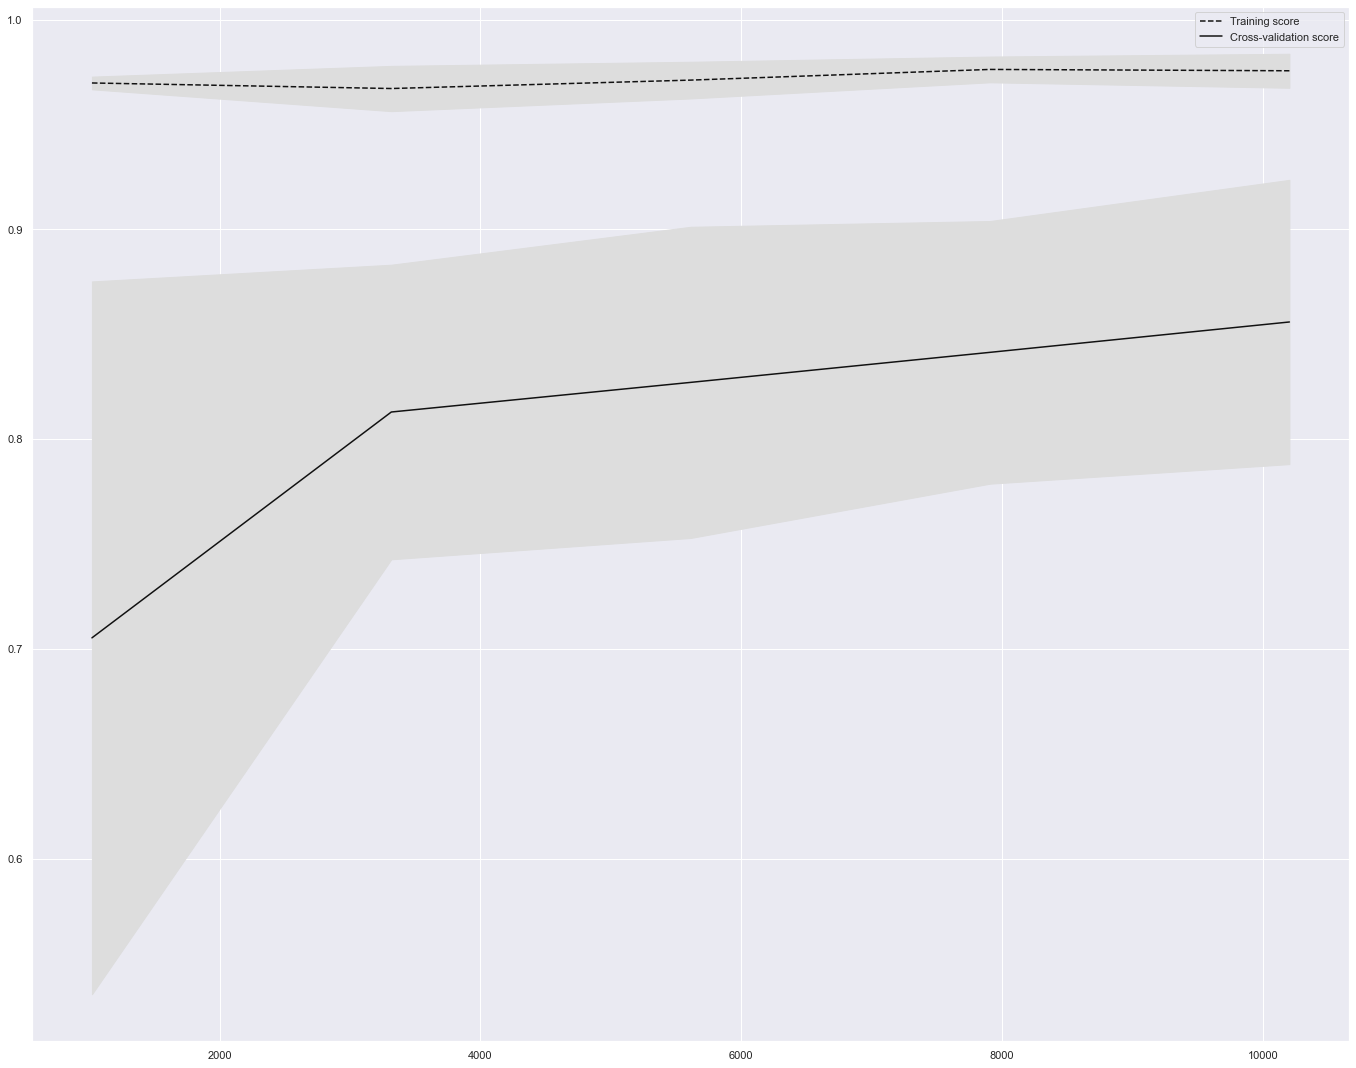

<Figure size 720x432 with 0 Axes>

In [69]:
#Learning Curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    train_sizes, train_scores, test_scores = learning_curve(rf, X_train, y_train, n_jobs=-1)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
    plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

    plt.tight_layout()
    plt.legend(loc="best")
    
    plt.figure(figsize=(10, 6))
    
    return plt
    
title = "Linear Regression Learning Curve"
estimator = RandomForestRegressor()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=10, n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

plt.show()